### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-11-22_18h12'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## Queue length plot for multigets

In [39]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'queuelength.csv')
df_ql

,client,worker,ratio,sharded,queueLength,queueLength_std
0,12,64,1:1,True,1.501344,0.017496
1,12,64,1:1,False,1.559183,0.023379
2,12,64,1:3,True,1.553708,0.012140
3,12,64,1:3,False,1.474456,0.064527
4,12,64,1:6,True,1.602151,0.007786
5,12,64,1:6,False,1.471777,0.016080
6,12,64,1:9,True,1.610139,0.001833
7,12,64,1:9,False,1.517463,0.007354


### sharded

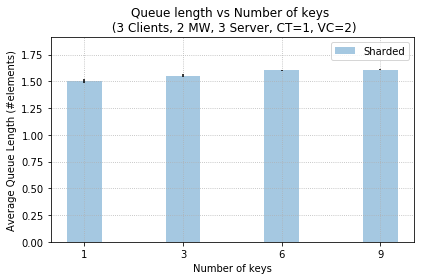

In [40]:
n_groups = 4
df_ql_s = df_ql[df_ql['sharded']==True]

means_ql = df_ql_s['queueLength']
std_ql = df_ql_s['queueLength_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_ql, bar_width,
                alpha=opacity,
                yerr=std_ql,
                label='Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Queue Length (#elements)')
ax.set_title('Queue length vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_ql)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/queueLength_sharded.png", dpi = 150)


### non sharded

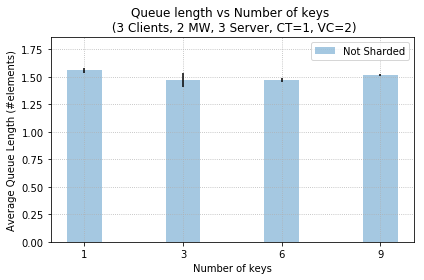

In [41]:
n_groups = 4
df_ql_n = df_ql[df_ql['sharded']==False]

means_ql = df_ql_n['queueLength']
std_ql = df_ql_n['queueLength_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_ql, bar_width,
                alpha=opacity,
                yerr=std_ql,
                label='Not Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Queue Length (#elements)')
ax.set_title('Queue length vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_ql)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/queueLength_notsharded.png", dpi = 150)


## Response-time breakdown histogram for multigets

In [4]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'rt_breakdown.csv')
df_b

,client,worker,ratio,sharded,netthreadTime,queueTime,workerPreTime,memcachedRTT,workerPostTime
0,12,64,1:1,True,0.013624,0.096163,0.018406,0.682996,0.014942
1,12,64,1:1,False,0.013611,0.100534,0.012451,0.662063,0.013695
2,12,64,1:3,True,0.013928,0.105366,0.046735,1.455375,0.017677
3,12,64,1:3,False,0.013651,0.096386,0.012601,1.112640,0.016309
4,12,64,1:6,True,0.014526,0.112299,0.050670,3.840547,0.026957
5,12,64,1:6,False,0.014040,0.091725,0.013810,3.062841,0.025238
6,12,64,1:9,True,0.015489,0.116336,0.055148,6.739470,0.034391
7,12,64,1:9,False,0.014240,0.095912,0.014074,4.850062,0.031217


### not sharded

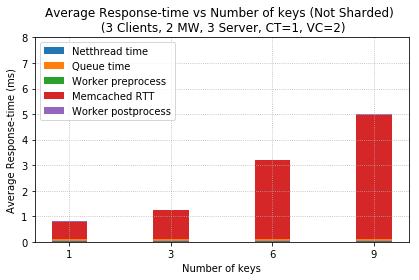

In [8]:
n_groups = 4
index = np.arange(n_groups)
df_ql_n = df_b[df_b['sharded']==False]

fig, ax = plt.subplots()

vcs = df_ql_n['ratio']
net_time = df_ql_n['netthreadTime']
queue_time = df_ql_n['queueTime']
workerPreTime = df_ql_n['workerPreTime']
memcachedRTT = df_ql_n['memcachedRTT']
workerPostTime = df_ql_n['workerPostTime']

width = 0.35       # the width of the bars: can also be len(x) sequence
ax.bar(vcs, net_time, width, label='Netthread time')
ax.bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
ax.bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
ax.bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
ax.bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

ax.grid(linestyle = "dotted")
ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Average Response-time vs Number of keys (Not Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylim(bottom=0)
ax.legend()

plt.ylim(bottom=0, top=8)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/rt_breakdown_notsharded.png", dpi = 150)


### sharded

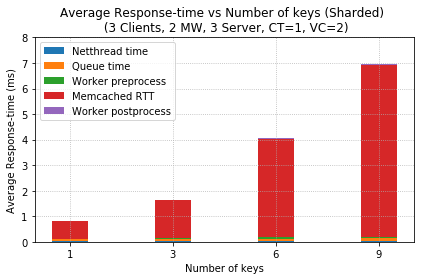

In [7]:
n_groups = 4
index = np.arange(n_groups)
df_ql_s = df_b[df_b['sharded']==True]

fig, ax = plt.subplots()

vcs = df_ql_s['ratio']
net_time = df_ql_s['netthreadTime']
queue_time = df_ql_s['queueTime']
workerPreTime = df_ql_s['workerPreTime']
memcachedRTT = df_ql_s['memcachedRTT']
workerPostTime = df_ql_s['workerPostTime']

width = 0.35       # the width of the bars: can also be len(x) sequence
ax.bar(vcs, net_time, width, label='Netthread time')
ax.bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
ax.bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
ax.bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
ax.bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

ax.grid(linestyle = "dotted")
ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Average Response-time vs Number of keys (Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylim(bottom=0)
ax.legend()

plt.ylim(bottom=0, top=8)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/rt_breakdown_sharded.png", dpi = 150)


## Response time histograms (mw)

In [45]:
# read data into pandas dataframe
df_hist = pd.read_csv(base_path + 'mw_histogram.csv')
df_hist

,mw,sharded,ratio,rep,latency,weight
0,1,True,1:6,1,1,0
1,1,True,1:6,1,2,0
2,1,True,1:6,1,3,0
3,1,True,1:6,1,4,1
4,1,True,1:6,1,5,35
5,1,True,1:6,1,6,269
6,1,True,1:6,1,7,1092
7,1,True,1:6,1,8,2200
8,1,True,1:6,1,9,3144
9,1,True,1:6,1,10,3515


## Histogram sharded get requests

In [74]:
df_s = df_hist[(df_hist['sharded']==True) & (df_hist['mw']==2) & (df_hist['latency']<=150)] 

In [76]:
df_s = df_hist[(df_hist['sharded']==True) & (df_hist['latency']<=150)] 

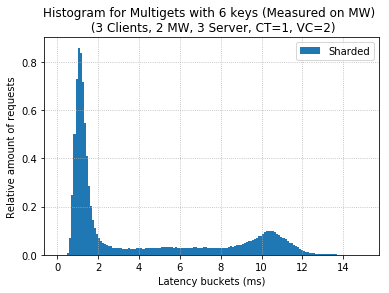

In [77]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on MW) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_s['latency']/10,bins=150,weights=df_s['weight'], density=True, label='Sharded',rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mw_histogram_sharded.png", dpi = 150)


## Histogram non-sharded get requests

In [84]:
df_n = df_hist[(df_hist['sharded']==False) & (df_hist['mw']==2) & (df_hist['latency']<=150)] 

In [86]:
df_n = df_hist[(df_hist['sharded']==False) & (df_hist['latency']<=150)] 

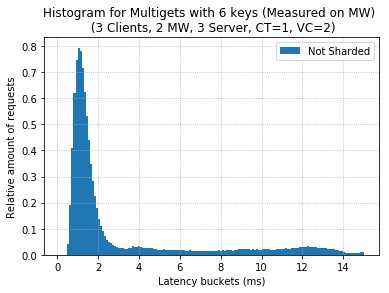

In [87]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on MW) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_n['latency']/10,bins=150,weights=df_n['weight'], density=True, label='Not Sharded', rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mw_histogram_nonsharded.png", dpi = 150)
